In [ ]:
from google.colab import files


uploaded = files.upload()

Saving mock_kaggle.csv to mock_kaggle.csv


In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['mock_kaggle.csv']))
print(df)


           data  venda  estoque  preco
0    2014-01-01      0     4972   1.29
1    2014-01-02     70     4902   1.29
2    2014-01-03     59     4843   1.29
3    2014-01-04     93     4750   1.29
4    2014-01-05     96     4654   1.29
..          ...    ...      ...    ...
932  2016-07-27     98     3179   2.39
933  2016-07-28    108     3071   2.39
934  2016-07-29    128     4095   2.39
935  2016-07-30    270     3825   2.39
936  2016-07-31    183     3642   2.39

[937 rows x 4 columns]


In [ ]:

df.columns = ['date', 'sale', 'stock', 'price']
df

,date,sale,stock,price
0,2014-01-01,0,4972,1.29
1,2014-01-02,70,4902,1.29
2,2014-01-03,59,4843,1.29
3,2014-01-04,93,4750,1.29
4,2014-01-05,96,4654,1.29
...,...,...,...,...
932,2016-07-27,98,3179,2.39
933,2016-07-28,108,3071,2.39
934,2016-07-29,128,4095,2.39
935,2016-07-30,270,3825,2.39


In [ ]:

import pandas as pd

df.index = pd.to_datetime(df.index)


for col in ['sale', 'stock', 'price']:
    df[col] = df[col].fillna(df[col].mean())

df = df[~df.index.duplicated(keep='first')]

df['rolling_mean_sale'] = df['sale'].rolling(window=7).mean()


df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month



df

,sale,stock,price,rolling_mean_sale,day_of_week,month
date,,,,,,
2014-01-01,0,4972,1.29,NaN,2,1
2014-01-02,70,4902,1.29,NaN,3,1
2014-01-03,59,4843,1.29,NaN,4,1
2014-01-04,93,4750,1.29,NaN,5,1
2014-01-05,96,4654,1.29,NaN,6,1
...,...,...,...,...,...,...
2016-07-27,98,3179,2.39,96.857143,2,7
2016-07-28,108,3071,2.39,103.714286,3,7
2016-07-29,128,4095,2.39,108.000000,4,7


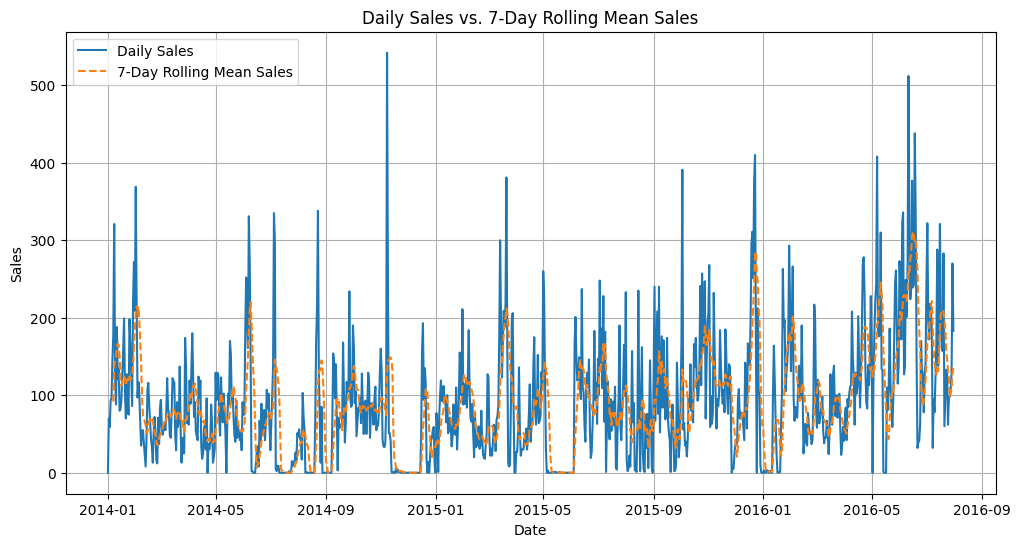

In [ ]:


import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
plt.plot(df.index, df['sale'], label='Daily Sales')
plt.plot(df.index, df['rolling_mean_sale'], label='7-Day Rolling Mean Sales', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Daily Sales vs. 7-Day Rolling Mean Sales')
plt.legend()
plt.grid(True)
plt.show()


